In [98]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np

In [99]:
lr=load_iris()
dir(lr)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [100]:
X=pd.DataFrame(lr.data)
y=pd.DataFrame(lr.target)
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [101]:
y.head()

,0
0,0
1,0
2,0
3,0
4,0


In [102]:
y = np.ravel(y)


In [103]:
m_p = {
    'SVM': {
        'model': SVC(),
        'params': {
            'C': [0.1, 1, 5, 10],
            'gamma': ['scale', 'auto'],
            'kernel': ['linear', 'rbf']
        }
    },
    'RandomForestClassifier': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10, 20],
            'criterion': ['gini', 'entropy']
        }
    },
    'GaussianNB': {
        'model': GaussianNB(),
        'params': {}
    },
    'MultinomialNB': {
        'model': MultinomialNB(),
        'params': {
            'alpha': [0.1, 0.5, 1.0]
        }
    },
    'DecisionTreeClassifier': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 5, 10, 20]
        }
    },
    'LogisticRegression': {
        'model': LogisticRegression(max_iter=5000, solver='lbfgs'),
        'params': {
            'C': [0.01, 0.1, 1, 10],
            'penalty': ['l2']
        }
    },
    'RandomForestRegressor': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': [10, 50, 100],
            'max_depth': [None, 5, 10, 20]
        }
    },
    'DecisionTreeRegressor': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': [None, 5, 10, 20],
            'criterion': ['squared_error', 'friedman_mse']
        }
    },
    'LinearRegression': {
        'model': LinearRegression(),
        'params': {}
    }
    ,
    'KNeighborsClassifier': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [1,3,5,10],
            'weights' : ['uniform', 'distance']
        }
    }
}


In [104]:
scores=[]

for model_name, mp in m_p.items():
  clf=GridSearchCV(mp['model'],mp['params'],cv=10,return_train_score=False)
  clf.fit(lr.data,lr.target)
  scores.append({
      'model':model_name,
      'best_score':clf.best_score_,
      'best_params':clf.best_params_
  })

In [105]:
scr = pd.DataFrame(scores,columns=['model','best_score','best_params']).sort_values(by='best_score',ascending=False)
scr

,model,best_score,best_params
5,LogisticRegression,0.986667,"{'C': 10, 'penalty': 'l2'}"
0,SVM,0.980000,"{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}"
9,KNeighborsClassifier,0.973333,"{'n_neighbors': 10, 'weights': 'distance'}"
1,RandomForestClassifier,0.966667,"{'criterion': 'gini', 'max_depth': None, 'n_es..."
4,DecisionTreeClassifier,0.960000,"{'criterion': 'gini', 'max_depth': 5}"
3,MultinomialNB,0.953333,{'alpha': 0.1}
2,GaussianNB,0.953333,{}
7,DecisionTreeRegressor,0.600000,"{'criterion': 'squared_error', 'max_depth': 10}"
6,RandomForestRegressor,0.498800,"{'max_depth': 10, 'n_estimators': 10}"
8,LinearRegression,0.159820,{}


Text(0, 0.5, 'Score')

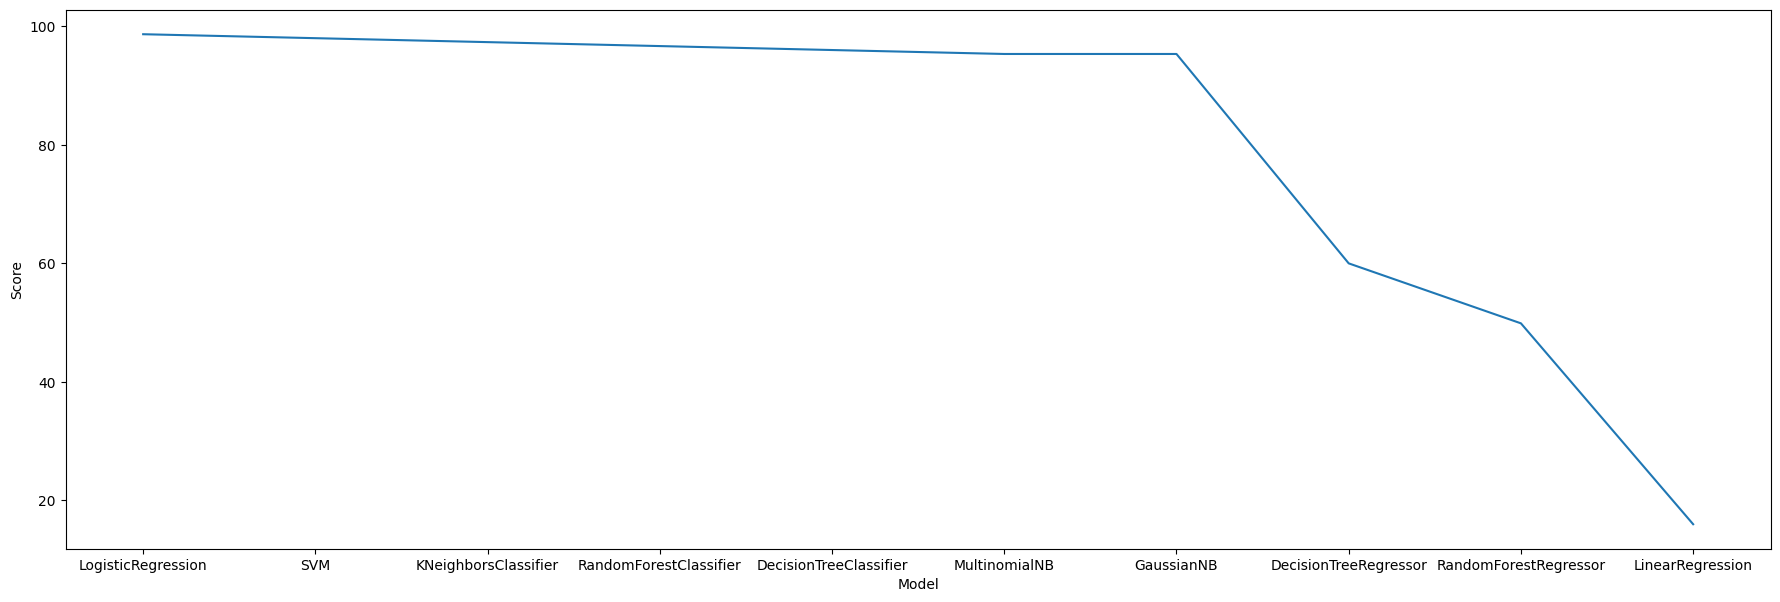

In [106]:
plt.figure(figsize=(22,7))
plt.plot(scr['model'],scr['best_score']*100)
plt.xlabel('Model')
plt.ylabel('Score')

**SVM** with parametersn C : 5, gamma : scale , kernel: rbf has the highest beacuse Non-linearly separable data


**Classifiers** are better than regressors as we are dealing with categorical values rather than continious